# Statsmodels
Statsmodels is a Python module that allows users to explore data, estimate statistical models, and perform statistical tests. An extensive list of descriptive statistics, statistical tests, plotting functions, and result statistics are available for different types of data and each estimator.

Library documentation: http://statsmodels.sourceforge.net/

## Linear Regression Models

In [115]:
# needed to display the graphs
%matplotlib inline
from pylab import *

In [116]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
np.random.seed(9876789)

In [117]:
# create some artificial data
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [118]:
# add column of 1s for intercept
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [119]:
# fit model and print the summary
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Mon, 08 May 2023   Prob (F-statistic):          2.83e-239
Time:                        06:26:35   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

In [120]:
# individual results parameters can be accessed
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [ 1.34233516 -0.04024948 10.01025357]
R2:  0.9999879365025871


In [121]:
# example with non-linear relationship
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.8
Date:                Mon, 08 May 2023   Prob (F-statistic):           6.30e-27
Time:                        06:26:35   Log-Likelihood:                -34.438
No. Observations:                  50   AIC:                             76.88
Df Residuals:                      46   BIC:                             84.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4687      0.026     17.751      0.0

In [122]:
# look at some quantities of interest
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [ 0.46872448  0.48360119 -0.01740479  5.20584496]
Standard errors:  [0.02640602 0.10380518 0.00231847 0.17121765]
Predicted values:  [ 4.77072516  5.22213464  5.63620761  5.98658823  6.25643234  6.44117491
  6.54928009  6.60085051  6.62432454  6.6518039   6.71377946  6.83412169
  7.02615877  7.29048685  7.61487206  7.97626054  8.34456611  8.68761335
  8.97642389  9.18997755  9.31866582  9.36587056  9.34740836  9.28893189
  9.22171529  9.17751587  9.1833565   9.25708583  9.40444579  9.61812821
  9.87897556 10.15912843 10.42660281 10.65054491 10.8063004  10.87946503
 10.86825119 10.78378163 10.64826203 10.49133265 10.34519853 10.23933827
 10.19566084 10.22490593 10.32487947 10.48081414 10.66779556 10.85485568
 11.01006072 11.10575781]


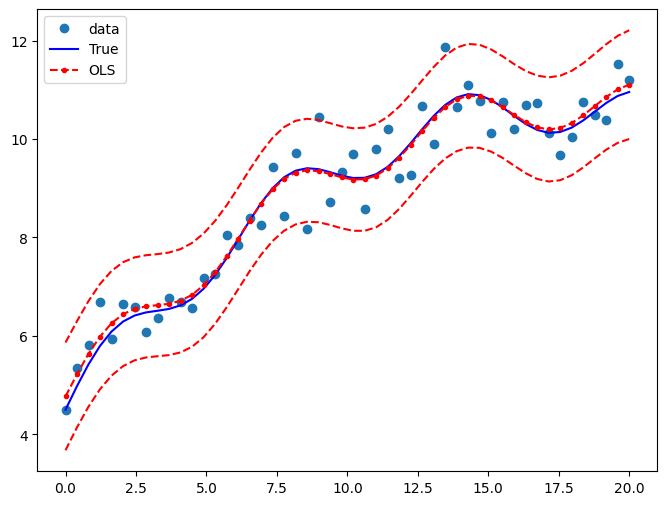

In [123]:
# plot the true relationship vs. the prediction
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best')

## Time-Series Analysis

In [127]:
from statsmodels.tsa.arima_process import arma_generate_sample
import statsmodels.api as sm

In [128]:
# generate some data
np.random.seed(123)
nobs = 100
y = np.random.rand(nobs).cumsum()
dates = pd.date_range('1980-01', periods=nobs, freq='M')
y = pd.Series(y, index=dates)

In [129]:
# fit ARIMA model
sarimax_mod = sm.tsa.SARIMAX(y, order=(2,1,2), trend='n')
sarimax_res = sarimax_mod.fit(disp=-1)

In [131]:
# print summary of results
print(sarimax_res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(2, 1, 2)   Log Likelihood                  -5.064
Date:                Mon, 08 May 2023   AIC                             20.128
Time:                        06:28:33   BIC                             33.103
Sample:                    01-31-1980   HQIC                            25.378
                         - 04-30-1988                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0012      0.977      0.001      0.999      -1.915       1.917
ar.L2          0.9988      0.978      1.022      0.307      -0.917       2.915
ma.L1          0.0033      4.616      0.001      0.9